In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df_LIWC = pd.read_csv('features-liwc2015', sep=' ')
df_result = pd.read_csv('outcomes', sep=' ')

In [33]:
df_LIWC.head()

,id,ACHIEVE,ADJ,ADVERB,AFFECT,AFFILIATION,ANGER,ANX,ARTICLE,ASSENT,...,SPACE,SWEAR,TENTAT,THEY,TIME,VERB,WE,WORK,YOU,Unnamed: 74
0,1,0.013948,0.035139,0.019539,0.034005,0.009933,0.002574,0.002075,0.042554,0.001191,...,0.040191,0.000692,0.009260,0.001806,0.031777,0.071046,0.002478,0.025590,0.029740,NaN
1,3,0.008114,0.025870,0.017965,0.033140,0.012115,0.010010,0.002864,0.028758,0.030203,...,0.060992,0.000490,0.007465,0.002643,0.031659,0.061078,0.005397,0.017023,0.004369,NaN
2,4,0.011303,0.040679,0.036365,0.053856,0.014579,0.006661,0.002584,0.044391,0.018619,...,0.050980,0.005169,0.017782,0.002967,0.042171,0.112426,0.002767,0.012686,0.015689,NaN
3,5,0.006012,0.022216,0.015682,0.022739,0.009148,0.001830,0.000784,0.028228,0.030842,...,0.035808,0.001307,0.007841,0.001307,0.020648,0.055672,0.002614,0.017250,0.009148,NaN
4,6,0.013545,0.055898,0.023477,0.036054,0.012839,0.002988,0.002483,0.032077,0.007126,...,0.036599,0.000727,0.021822,0.001090,0.032077,0.079052,0.001090,0.016452,0.044189,NaN


In [34]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 8 columns):
user_id       863 non-null int64
is_female     863 non-null int64
age           863 non-null int64
logdt         863 non-null float64
lognarc       863 non-null float64
logpsyc       863 non-null float64
logmach       863 non-null float64
Unnamed: 7    0 non-null float64
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


In [35]:
df_result.head()

,user_id,is_female,age,logdt,lognarc,logpsyc,logmach,Unnamed: 7
0,1,1,30,1.152680,1.321760,1.011600,1.098610,NaN
1,2,1,36,0.000000,0.000000,0.000000,0.000000,NaN
2,3,0,29,0.733969,0.405465,0.693147,1.011600,NaN
3,4,1,24,0.348307,0.223144,0.223144,0.559616,NaN
4,5,0,19,1.203970,1.558140,0.223144,1.386290,NaN


In [36]:
df_result.rename(columns={'user_id':'id'}, inplace=True)
df = pd.merge(df_LIWC, df_result, how='left')

In [37]:
df.dropna(axis=1, inplace=True)

In [38]:
df.drop(columns=['is_female', 'age', 'logdt','lognarc','logmach', 'id'], inplace=True)
df.head()

,ACHIEVE,ADJ,ADVERB,AFFECT,AFFILIATION,ANGER,ANX,ARTICLE,ASSENT,AUXVERB,...,SPACE,SWEAR,TENTAT,THEY,TIME,VERB,WE,WORK,YOU,logpsyc
0,0.013948,0.035139,0.019539,0.034005,0.009933,0.002574,0.002075,0.042554,0.001191,0.025091,...,0.040191,0.000692,0.009260,0.001806,0.031777,0.071046,0.002478,0.025590,0.029740,1.011600
1,0.008114,0.025870,0.017965,0.033140,0.012115,0.010010,0.002864,0.028758,0.030203,0.028514,...,0.060992,0.000490,0.007465,0.002643,0.031659,0.061078,0.005397,0.017023,0.004369,0.693147
2,0.011303,0.040679,0.036365,0.053856,0.014579,0.006661,0.002584,0.044391,0.018619,0.056277,...,0.050980,0.005169,0.017782,0.002967,0.042171,0.112426,0.002767,0.012686,0.015689,0.223144
3,0.006012,0.022216,0.015682,0.022739,0.009148,0.001830,0.000784,0.028228,0.030842,0.025353,...,0.035808,0.001307,0.007841,0.001307,0.020648,0.055672,0.002614,0.017250,0.009148,0.223144
4,0.013545,0.055898,0.023477,0.036054,0.012839,0.002988,0.002483,0.032077,0.007126,0.046753,...,0.036599,0.000727,0.021822,0.001090,0.032077,0.079052,0.001090,0.016452,0.044189,0.000000


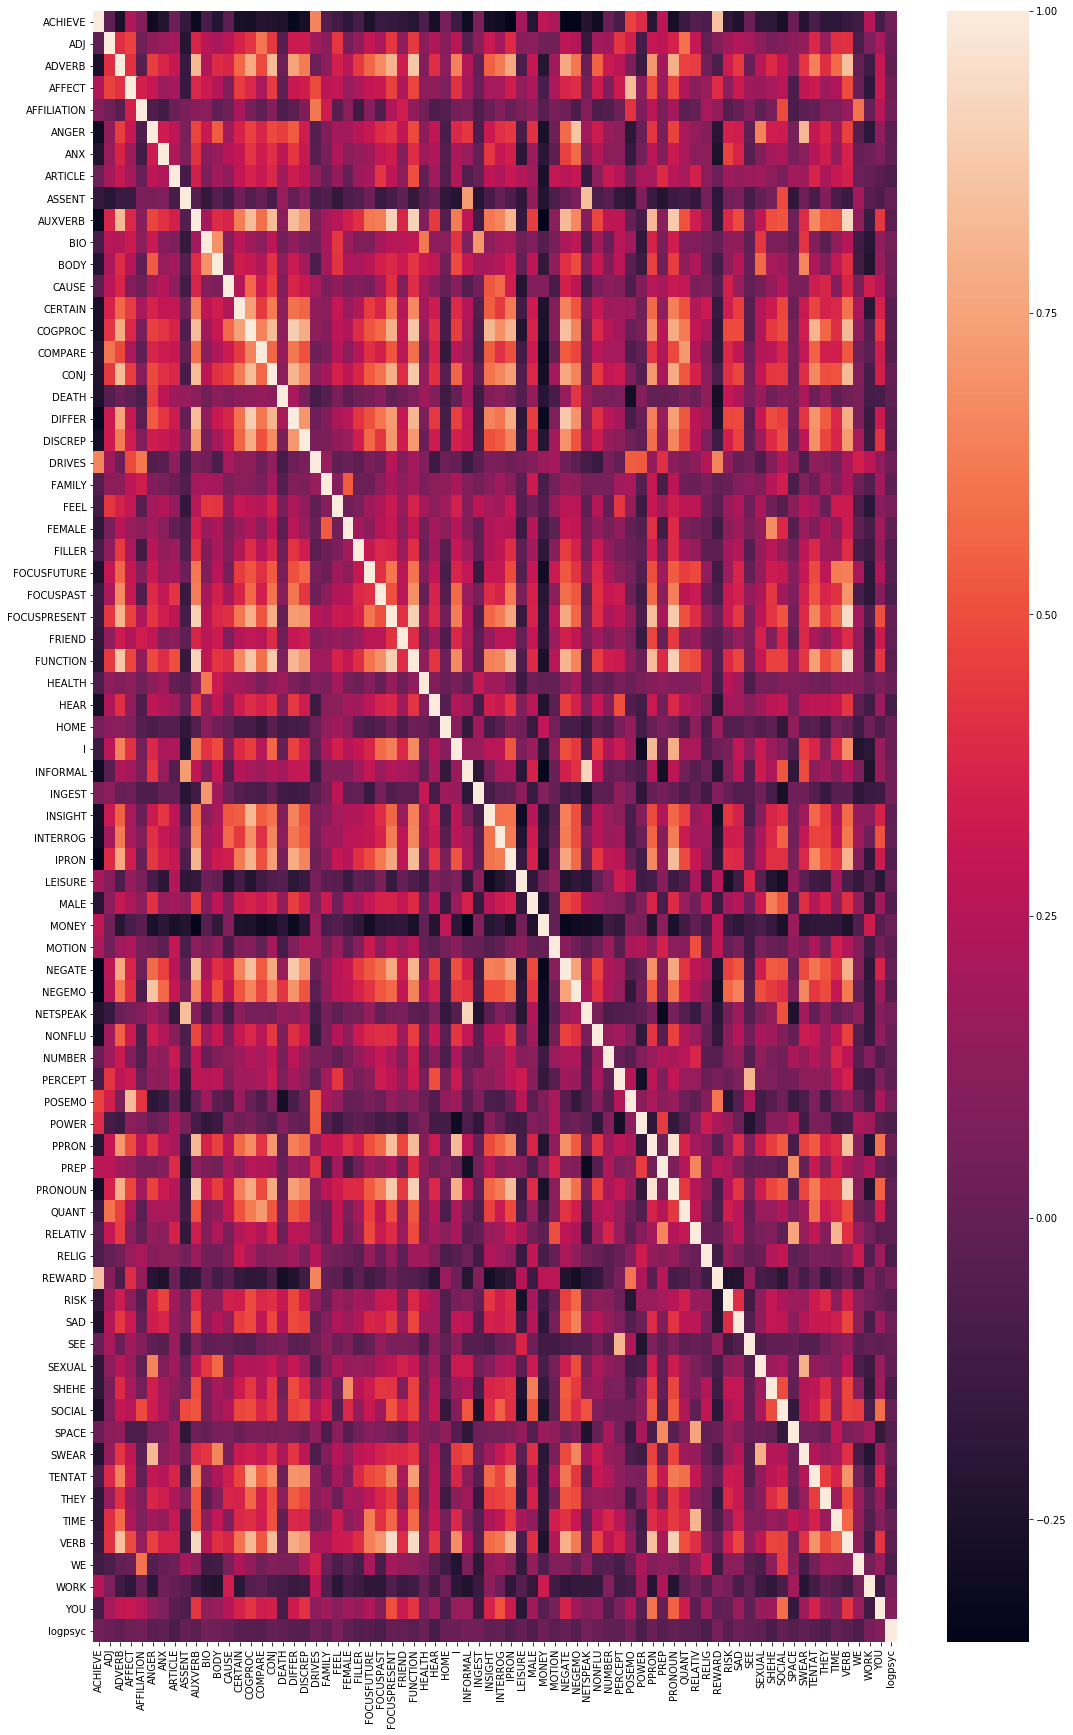

In [70]:
corr = df.corr()
fig = plt.figure(figsize=(18,30))
sns.heatmap(corr)

In [93]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
print(selected_columns)
# data = data[selected_columns]

Index(['ACHIEVE', 'ADJ', 'ADVERB', 'AFFECT', 'AFFILIATION', 'ANGER', 'ANX',
       'ARTICLE', 'ASSENT', 'AUXVERB', 'BIO', 'BODY', 'CAUSE', 'CERTAIN',
       'COGPROC', 'COMPARE', 'CONJ', 'DEATH', 'DIFFER', 'DISCREP', 'DRIVES',
       'FAMILY', 'FEEL', 'FEMALE', 'FILLER', 'FOCUSFUTURE', 'FOCUSPAST',
       'FRIEND', 'HEALTH', 'HEAR', 'HOME', 'I', 'INFORMAL', 'INGEST',
       'INSIGHT', 'INTERROG', 'IPRON', 'LEISURE', 'MALE', 'MONEY', 'MOTION',
       'NEGATE', 'NEGEMO', 'NONFLU', 'NUMBER', 'PERCEPT', 'POSEMO', 'POWER',
       'PPRON', 'PREP', 'QUANT', 'RELATIV', 'RELIG', 'REWARD', 'RISK', 'SAD',
       'SEE', 'SEXUAL', 'SHEHE', 'SOCIAL', 'SPACE', 'SWEAR', 'TENTAT', 'THEY',
       'TIME', 'WE', 'WORK', 'YOU', 'logpsyc'],
      dtype='object')


In [97]:
# columns = np.full((corr.shape[0],), True, dtype=bool)
for i in df.columns:
    if i not in df.columns[columns]:
        print(i)

FOCUSPRESENT
FUNCTION
NETSPEAK
PRONOUN
VERB


In [54]:
features = list(df.columns)
features.remove('logpsyc')
X = df[features]
y = df['logpsyc']

In [57]:
X.head()

,ACHIEVE,ADJ,ADVERB,AFFECT,AFFILIATION,ANGER,ANX,ARTICLE,ASSENT,AUXVERB,...,SOCIAL,SPACE,SWEAR,TENTAT,THEY,TIME,VERB,WE,WORK,YOU
0,0.013948,0.035139,0.019539,0.034005,0.009933,0.002574,0.002075,0.042554,0.001191,0.025091,...,0.061421,0.040191,0.000692,0.009260,0.001806,0.031777,0.071046,0.002478,0.025590,0.029740
1,0.008114,0.025870,0.017965,0.033140,0.012115,0.010010,0.002864,0.028758,0.030203,0.028514,...,0.072704,0.060992,0.000490,0.007465,0.002643,0.031659,0.061078,0.005397,0.017023,0.004369
2,0.011303,0.040679,0.036365,0.053856,0.014579,0.006661,0.002584,0.044391,0.018619,0.056277,...,0.073240,0.050980,0.005169,0.017782,0.002967,0.042171,0.112426,0.002767,0.012686,0.015689
3,0.006012,0.022216,0.015682,0.022739,0.009148,0.001830,0.000784,0.028228,0.030842,0.025353,...,0.060899,0.035808,0.001307,0.007841,0.001307,0.020648,0.055672,0.002614,0.017250,0.009148
4,0.013545,0.055898,0.023477,0.036054,0.012839,0.002988,0.002483,0.032077,0.007126,0.046753,...,0.076710,0.036599,0.000727,0.021822,0.001090,0.032077,0.079052,0.001090,0.016452,0.044189
